# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

#%load_ext pycodestyle_magic

In [2]:
class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        if init == 'random':
            self.centrs = self.centrs_random
        if init == 'k-means':
            self.centrs= self.centrs_plus

    def centrs_random(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k)]

    def centrs_plus(self, X):
        sqr_x = (X ** 2).sum(axis=1)
        self.centroids[0] = X[np.random.choice(X.shape[0])]
        for i in range(1, self.k):
            mul_x = np.dot(X, self.centroids[:i].T)
            sqr_centrs = (self.centroids[:i] ** 2).sum(axis=1)
            sqr_dist  = sqr_x.reshape(-1, 1) + sqr_centrs - 2 * mul_x 
            dist = np.min(sqr_dist, axis=1)
            self.centroids[i] = X[np.random.choice(X.shape[0], size = 1, p = abs(dist/dist.sum()))]

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        self.centrs(X)
        eps = 1e-10
        centroids = np.empty((self.k, X.shape[1]))
        for iters in range(self.max_iter):
            sqr_x = (X ** 2).sum(axis=1)
            mul_x = np.dot(self.centroids, X.T)
            sqr_centrs = (self.centroids ** 2).sum(axis=1)
            sqr_dist  = sqr_x + sqr_centrs.reshape(-1, 1) - 2 * mul_x 
            self.labels = np.argmin(sqr_dist, axis=0)
            for i in range(self.k):
                centroids[i] = (X[self.labels == i, :]).mean(axis = 0)
            if ((centroids - self.centroids) ** 2).sum() < eps:
                return self
            self.centroids = centroids
        self.labels = np.abs(self.labels)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        
        """
        sqr_x = (X ** 2).sum(axis=1)
        mul_x = np.dot(self.centroids, X.T)
        sqr_centrs = (self.centroids ** 2).sum(axis=1)
        sqr_dist  = sqr_x + sqr_centrs.reshape(-1, 1) - 2 * mul_x 
        self.labels = np.argmin(sqr_dist, axis=0)
        return self.labels

class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', batch_size=10):
        self.batch_size = batch_size
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        if init == 'random':
            self.centrs = self.centrs_random
        if init == 'k-means':
            self.centrs = self.centrs_plus

    def fit(self, X):
         # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        self.centrs(X)
        eps = 1e-5
        centroids = np.empty((self.k, X.shape[1]))
        
        for iters in range(self.max_iter):
            np.random.shuffle(X)
            batch = X[:self.batch_size]
            sqr_batch = np.sum(batch ** 2, axis=1)
            mul_batch = np.dot(self.centroids, batch.T)
            sqr_centrs = (self.centroids ** 2).sum(axis=1)
            sqr_dist  = sqr_batch + sqr_centrs.reshape(-1, 1) - 2 * mul_batch
            self.labels = np.argmin(sqr_dist, axis=0)
            for i in range(self.k):
                if self.labels[self.labels == i].shape[0] != 0:
                    centroids[i] = np.mean(batch[self.labels == i, :], axis = 0)
            if np.sum((centroids - self.centroids) ** 2) < eps:
                return self
            self.centroids = centroids
        sqr_x = np.sum(X ** 2, axis=1)
        mul_x = np.dot(self.centroids, X.T)
        sqr_centrs = np.sum(self.centroids ** 2, axis=1)
        sqr_dist  = sqr_x + sqr_centrs.reshape(-1, 1) - 2 * mul_x 
        self.labels = np.argmin(sqr_dist, axis=0)
        self.labels = np.abs(self.labels)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

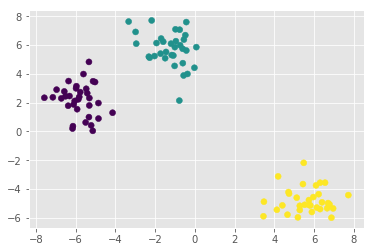

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [6]:
def work(model):
    model.fit(X)
    y = model.predict(X)
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=100)
    plt.scatter(X[:,0], X[:, 1], c = y)


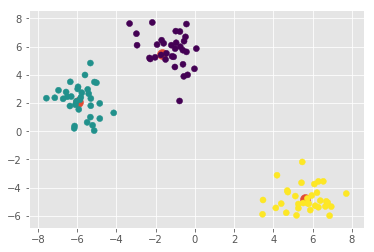

In [9]:
## Работоспособность MyKmeans
work(MyKmeans(k=3))

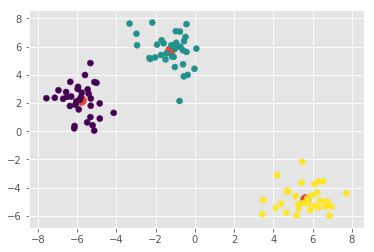

In [10]:
## Работоспособность MyKmeans++
work(MyKmeans(k=3, init='k-means'))

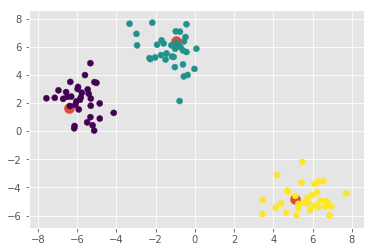

In [13]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
work(MiniBatchKMeans(k=3))

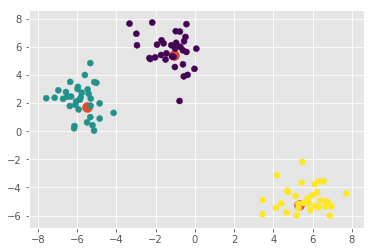

In [12]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
work(MiniBatchKMeans(k=3, init='k-means'))

In [14]:
import time

In [15]:
def times(model):
    number = [100, 200, 500, 1000, 2000, 5000, 10000, 50000, 100000]
    times = []
    for s in number:
        X, y = make_blobs(n_samples=s, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=123)
        t1 = time.time()
        model.fit(X)
        t2 = time.time()
        times.append(t2 - t1)
    plt.plot(number, times)
    plt.xlabel('number')
    plt.ylabel('time')


In [16]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans

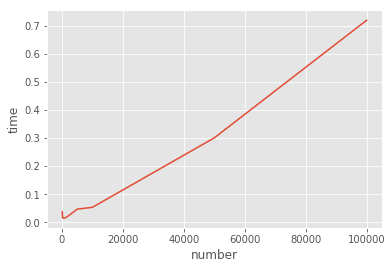

In [17]:
times(KMeans(n_clusters=3))

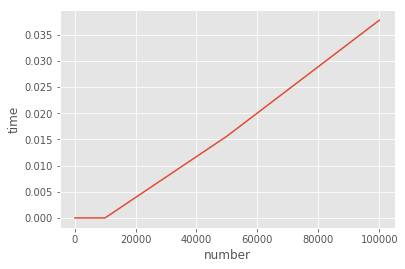

In [18]:
## Время выполнения алгоритма MyKmeans
times(MyKmeans(k=3))

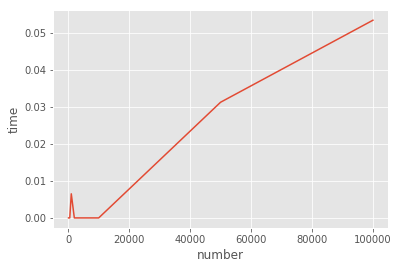

In [19]:
## Время выполнения алгоритма MyKmeans++
times(MyKmeans(k=3, init='k-means'))

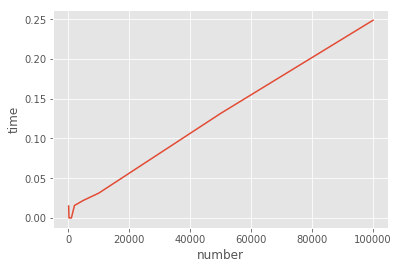

In [20]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
times(MiniBatchKMeans(k=3))

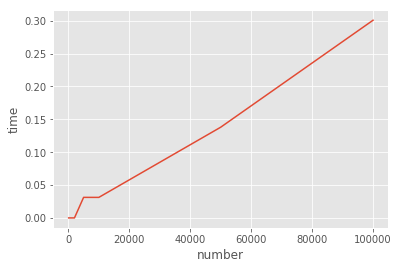

In [21]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
times(MiniBatchKMeans(k=3, init='k-means'))

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [22]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [23]:
X = df_sns.drop(df_sns.columns[:4], axis=1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

def prediction(model):
    model.fit(X.values)
    label = X
    label.loc[:, 'label'] = model.predict(X.values)
    for c, group in label.groupby('label'):
        print('Cluster: {}'.format(c))
        print(group.iloc[:, 4:-1].mean().abs().nlargest(5))
        print('=' * 10 + '\n')

In [34]:
## MyKMeans
%time prediction(MyKmeans(k=9))

Cluster: 0
baseball    8.304294
sports      0.790806
rock        0.292672
shopping    0.245724
church      0.202032
dtype: float64

Cluster: 1
hot        2.082614
hair       1.825829
kissed     1.432119
clothes    1.418999
cute       1.394097
dtype: float64

Cluster: 2
dress       2.164546
shopping    0.330018
dance       0.220373
drugs       0.106300
drunk       0.085042
dtype: float64

Cluster: 3
church      3.842229
bible       1.885470
jesus       1.839354
god         1.566052
shopping    0.273193
dtype: float64

Cluster: 4
volleyball    7.375700
sports        1.304277
shopping      0.481445
hair          0.305411
cute          0.266656
dtype: float64

Cluster: 5
drugs       1.129252
drunk       1.069894
swimming    1.051727
hair        0.962733
die         0.820965
dtype: float64

Cluster: 6
mall           1.871010
shopping       0.756059
hollister      0.568091
abercrombie    0.560055
cute           0.395532
dtype: float64

Cluster: 7
god       0.377684
sports    0.361562
mall   

In [31]:
## MyKMeans++
%time prediction(MyKmeans(k=9, init='k-means'))

Cluster: 0
volleyball    6.258794
sports        0.439554
shopping      0.344758
church        0.208875
cute          0.169529
dtype: float64

Cluster: 1
shopping    0.373479
cute        0.288770
music       0.277548
hair        0.274617
clothes     0.271918
dtype: float64

Cluster: 2
marching     7.913528
band         5.348198
music        0.629131
hollister    0.159066
rock         0.136843
dtype: float64

Cluster: 3
baseball    9.349015
sports      0.838322
shopping    0.342838
church      0.260123
rock        0.243306
dtype: float64

Cluster: 4
church     1.568142
god        0.812845
jesus      0.718110
clothes    0.676023
die        0.466873
dtype: float64

Cluster: 5
sports    7.323423
hair      1.155276
drugs     0.784401
music     0.716243
kissed    0.712871
dtype: float64

Cluster: 6
shopping    0.396189
bible       0.210233
sports      0.194963
swimming    0.180734
music       0.168061
dtype: float64

Cluster: 7
hair      2.071881
drugs     1.643840
kissed    1.422766
sex     

In [36]:
## MyKMeans с MiniBatchMyKMeans
%time prediction(MiniBatchKMeans(k=9, batch_size = 10))

Cluster: 0
cheerleading    5.631904
shopping        0.646733
abercrombie     0.603344
hollister       0.532554
mall            0.416439
dtype: float64

Cluster: 1
baseball    7.776933
sports      0.791688
rock        0.543263
cute        0.209247
church      0.206825
dtype: float64

Cluster: 2
dress       1.659700
church      0.849767
hot         0.633571
shopping    0.574823
cute        0.396930
dtype: float64

Cluster: 3
bible     9.776562
god       2.844990
jesus     2.461798
church    1.227647
tennis    1.139617
dtype: float64

Cluster: 4
dress       0.194486
swimming    0.173549
hair        0.150875
church      0.149537
rock        0.147077
dtype: float64

Cluster: 5
swimming    2.283535
hair        0.797460
drugs       0.703085
music       0.661382
drunk       0.616700
dtype: float64

Cluster: 6
tennis    6.235043
sports    1.080544
music     1.062268
hair      1.038806
rock      0.990786
dtype: float64

Cluster: 7
rock      4.675569
band      0.778089
music     0.736156
dance   

In [38]:
## MyKMeans++ с MiniBatchMyKMeans
%time prediction(MiniBatchKMeans(k=9, init='k-means', batch_size = 100))

Cluster: 0
hair            0.148811
sports          0.141412
cheerleading    0.133018
kissed          0.125795
abercrombie     0.123165
dtype: float64

Cluster: 1
kissed    3.047908
drugs     2.778083
sex       1.988823
hair      1.790296
die       1.487983
dtype: float64

Cluster: 3
cheerleading    3.235107
swimming        1.663211
shopping        0.729514
abercrombie     0.678760
cute            0.472127
dtype: float64

Cluster: 4
dress          1.369132
volleyball     1.345631
hollister      1.195836
dance          1.191554
abercrombie    1.163625
dtype: float64

Cluster: 5
swimming    59.702484
sports       1.825662
dance        0.494449
shopping     0.487306
cute         0.402356
dtype: float64

Cluster: 6
tennis      9.454006
church      5.318018
shopping    0.526204
band        0.433694
sports      0.401518
dtype: float64

Cluster: 7
sports      3.881376
marching    1.078665
band        1.041027
music       0.723748
hair        0.652274
dtype: float64

Cluster: 8
death     10.70

In [35]:
## Вывод:
# На игрушечных данных все методы довольно точно способны определить центройды,
# однако в моей реализации MiniBAtch показал себя медленее,
# а методы без K-means++ не всегда с 1 раза могли выделить кластеры верно.
#То есть для игрушечного сета наиболее подходящим стал бы Kmeans++.

#При работе на реальных данных

#Для многих полученных кластеров действительно получается выделить общую тему (например, связанную с религией или спортом)
#K-means++ работает заметно медленнее, чем K-means, но критической разницы в точности не наблюдается
#Также на тестовом наборе скорость MiniBatch Kmeans несколько превышает скорость обычного
